## 0.0 IMPORTS

In [1]:
# Imports
import joblib #salvar em disco
import pickle #salvar em disco

import numpy  as np #manipulação
import pandas as pd #manipulação

import seaborn                as sns #visualização
from matplotlib import pyplot as plt #visualização

import sklearn #framework machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics         import accuracy_score


%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

### 0.1 Helper Functions

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Camila D'Angelo

pandas    : 1.4.2
sklearn   : 1.1.2
seaborn   : 0.11.2
numpy     : 1.20.3
joblib    : 1.1.0
matplotlib: 3.4.3



## LOADING DATA

In [4]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Check Shape
dados.shape

(583, 11)

In [6]:
# Check Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Check amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.60,1
107,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
115,50,Male,7.3,3.6,1580,88,64,5.6,2.3,0.60,2
422,41,Male,1.2,0.5,246,34,42,6.9,3.4,0.97,1
110,24,Female,0.7,0.2,188,11,10,5.5,2.3,0.71,2
248,40,Male,0.7,0.1,202,37,29,5.0,2.6,1.00,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
287,43,Male,1.3,0.6,155,15,20,8.0,4.0,1.00,2
331,26,Male,1.7,0.6,210,62,56,5.4,2.2,0.60,1
455,21,Female,0.6,0.1,186,25,22,6.8,3.4,1.00,1


## Análise Exploratória de Dados

In [8]:
# Check tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
# Check Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [10]:
# Check Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [11]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


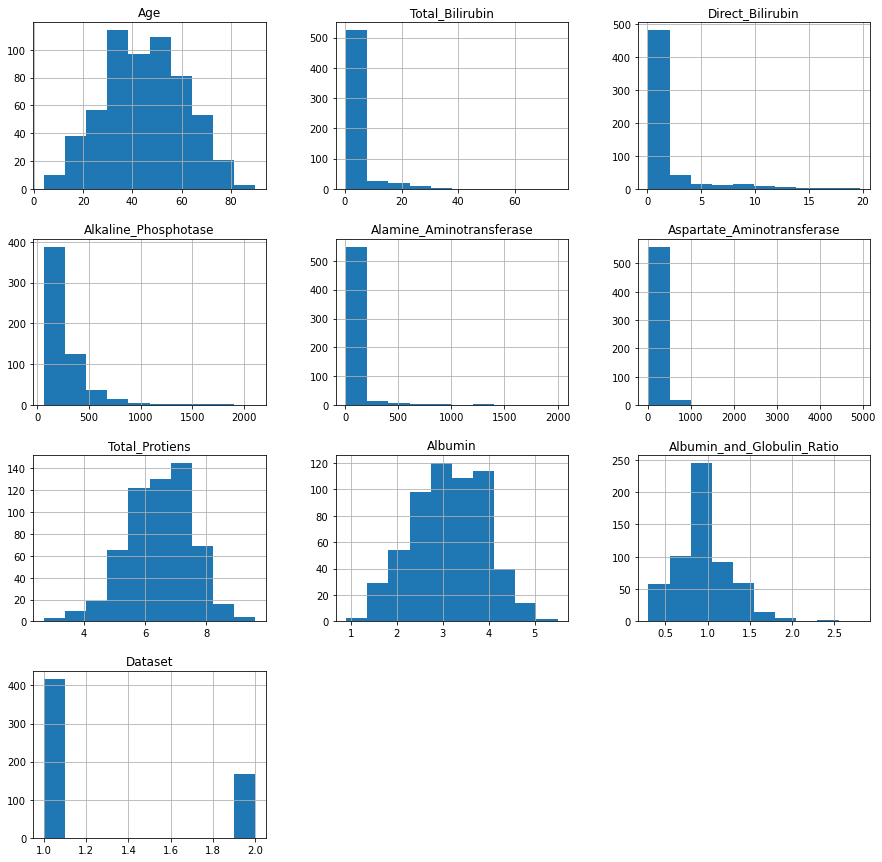

In [12]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

> Análise

   * Aparentemente a variavél **age** segue uma distribuição normal;
   * Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.
    
   * A coluna **dataset** (variável target) tem duas classes:
       * '1' para doença hepática e 
       * '2' para nenhuma doença hepática.
       
    Vamos ajustar a variável colocando valores mais fáceis de interpretar. **A classe negativa (não tem a doença) será zero**.

> **Ajustando a variavél target**

In [13]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [14]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [15]:
# Renomeando o nome da variável target
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [16]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
197,26,Female,0.6,0.2,142,12,32,5.7,2.4,0.75,1
211,42,Male,2.7,1.3,219,60,180,7.0,3.2,0.80,1
552,45,Male,0.6,0.1,196,29,30,5.8,2.9,1.00,1
31,52,Male,0.9,0.2,156,35,44,4.9,2.9,1.40,1
269,26,Male,0.6,0.1,110,15,20,2.8,1.6,1.30,1


In [17]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


> **Análise**

* Variavél **age** apresenta baixa correlação com as demais variavéis, ou seja, não parece haver uma relação direta com as características que indicam a doença hepática;
   
* Variavél **Total_Bilirubin** apresenta 0.87 de correlação com a variavél **Direct_Bilirubin**. Correlação muito forte.  **Atenção multicolinearidade**. Analisar exclusão de uma das duas variavéis

* Variavél **Aspartate_Aminotransferase** apresenta 0.79 de correlação com a variavél **Alamine_Aminotransferase**.Correlação Forte. **Atenção multicolinearidade**

* Variavél **Total_Protiens** apresenta 0.78 de correlação com a variavél **Albumin**. Correlação Forte.  **Atenção multicolinearidade**

### Exploração da Variável Categórica

In [18]:
# Resumo da variavél categórica: contagem de frequência
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


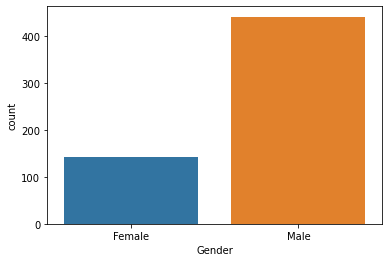

In [19]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

> **Label Encoding**:  transformar a variável categórica em sua representação numérica 

In [20]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [22]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
141,66,1,4.2,2.1,159,15,30,7.1,2.2,0.4,1
545,45,1,0.7,0.2,153,41,42,4.5,2.2,0.9,0
317,35,0,0.7,0.2,198,42,30,6.8,3.4,1.0,1
368,42,1,0.8,0.2,182,22,20,7.2,3.9,1.1,1
381,39,0,0.6,0.2,188,28,43,8.1,3.3,0.6,1


### Verificando a Relação Entre Atributos

In [23]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


> Correlação **Total_Bilirubin** vs **Direct_Bilirubin** em relação a **varivaél Target**

* Relação positiva entre as duas variavéis, confirmando a multicolinearidade,sendo assim podemos remover uma das duas variaveis dos dados.
    
* Cor laranja (target=1=sim) tem representação quase que totalitaria no gráfico.

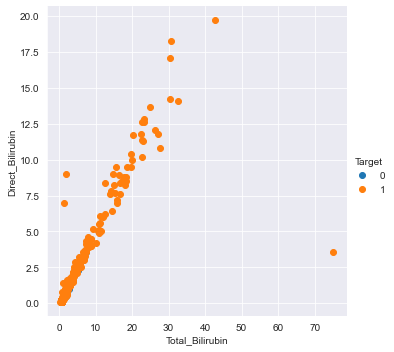

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

> Correlação **Total_Bilirubin** vs **Direct_Bilirubin** em relação a **varivaél gender**

* 0: Masculino
* 1: Feminino

    Padrão do relacionamento é o mesmo, ou seja, o sexo do paciente não parece ter uma relação direta com as duas variavéis

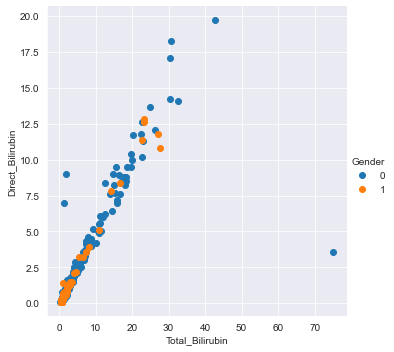

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

> Correlação **Total_Bilirubin** vs **Albumin** em relação a **varivaél Target**

* Não parece haver uma correlação clara entre as duas variavéis

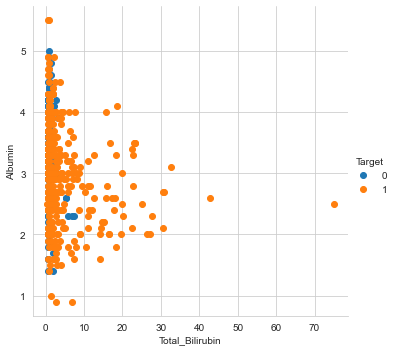

In [26]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

> Correlação **Total_Bilirubin** vs **Albumin** em relação a **gender**

* Não parece haver uma correlação clara entre as duas variavéis

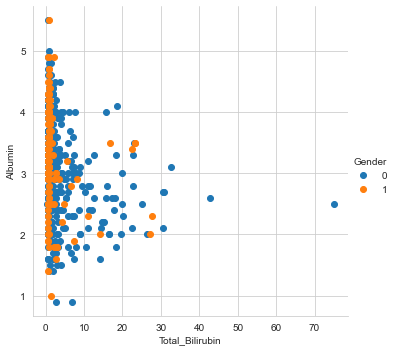

In [27]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

## Data Cleaning

### Verificando Valores Ausentes e Registros Duplicados

In [28]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [29]:
# Verificando registros duplicados (complete cases): linhas onde todas as colunas tem as mesmas informações
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


### Tratamento de Registros Duplicados

In [30]:
dados.shape

(583, 11)

In [31]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [32]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


> Variavél **Alamine_Aminotransferase**

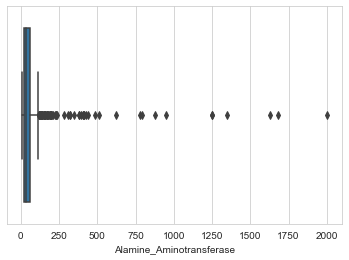

In [33]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase);

> **Checando se os valores extremos são mesmo outliers?**

In [34]:
# Contagem de frequência por valor
# Neste caso os para os maiores valore do dataset existem muito mais que um ou dois registros, o que nos indica que este é um
# padrão observado nos dados e não outliers com isso não remoceremos do dataset
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

> Variavél **Aspartate_Aminotransferase**

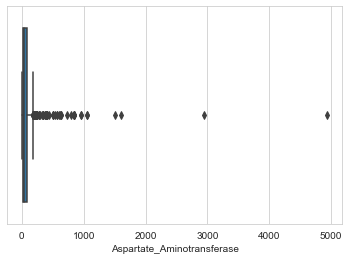

In [35]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase);

In [36]:
# Contagem de frequência por valor
# Neste caso a diferença dos valores extremos para média é muito grande, possivelmente estes pacientes com valores tão altos
# são de outra categoria.
# Sendo assim, trataremos esses dados no dataset
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
# Mantém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

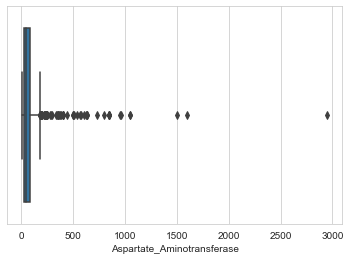

In [38]:
# Check outliers: Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [39]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [40]:
# Mantém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [41]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [42]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [43]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [44]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [45]:
dados.shape

(568, 11)

In [46]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')  

In [47]:
dados.shape

(564, 11)

In [48]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [49]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
213,8,1,0.9,0.2,401,25,58,7.5,3.4,0.80,1
13,74,1,1.1,0.4,214,22,30,8.1,4.1,1.00,1
72,75,1,0.8,0.2,205,27,24,4.4,2.0,0.80,1
293,23,0,1.1,0.5,191,37,41,7.7,4.3,1.20,0
568,20,1,16.7,8.4,200,91,101,6.9,3.5,1.02,1


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

> Removendo a varaivél **Direct_Bilirubin**

In [50]:
# Data a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [51]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [52]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


> **Aprendizado Supervisionado**

    ENTRADA (x) : Variavés de entrada: preditoras
    SAÍDA   (y) : Variavéis de saída: target

In [53]:
# Dividindo as variaveis de entrada e saída para aprendizado supervisionado
# Cria um objeto separado para a variável target
y = dados.Target

In [54]:
# Cria um objeto separadado para as variáveis de entrada
# Excluindo as varaivel target e selecionando as outras colunas
X = dados.drop('Target', axis = 1)

In [55]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # varivaés preditoras
                                                        y, # variavél target
                                                        test_size = 0.25,    # 25% das linnhas vão para teste e 75% para treino
                                                        random_state = 1234, # permitir o processo aleatório
                                                        stratify = dados.Target) # Amostragem estratificada

In [56]:
len(X_treino)

423

In [57]:
len(X_teste)

141

In [58]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [59]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Balanceamento de Classe

In [60]:
# Indicação se o paciente tem ou não a doença
# 1: sim
# 0: não

# Como podemos observar a classe 1 possui mais do dobro da classe 0, ou seja, estão desbalanceadas
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [61]:
# Instala o pacote
#!pip install -q imblearn

In [62]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [63]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Data Science Academy

pandas    : 1.4.2
sklearn   : 1.1.2
seaborn   : 0.11.2
imblearn  : 0.0
numpy     : 1.20.3
joblib    : 1.1.0
matplotlib: 3.4.3



> **Técnica oversampling**

In [64]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

In [65]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
# É importante destacar que o balaceamento deve ser aplicado apenas em dados de treino porque temos mais exemplos 
# de um padrão do que outro. Sendo assim o dados de treinos serão tendeciosos
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [66]:
len(X_res)

602

In [67]:
len(y_res)

602

In [68]:
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [69]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [70]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

### Padronização dos Dados

> Dados de **TREINO**

In [71]:
# Aqui podemos observar que as variavéis não estão na mesma escala
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [72]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()

print(treino_mean)
print(treino_std)

Age                            43.616279
Gender                          0.204319
Total_Bilirubin                 2.670614
Alkaline_Phosphotase          269.762458
Alamine_Aminotransferase       62.671096
Aspartate_Aminotransferase     78.230897
Total_Protiens                  6.549216
Albumin                         3.259542
Albumin_and_Globulin_Ratio      0.999947
dtype: float64
Age                            16.358523
Gender                          0.403538
Total_Bilirubin                 5.565598
Alkaline_Phosphotase          221.291922
Alamine_Aminotransferase      139.948439
Aspartate_Aminotransferase    144.073383
Total_Protiens                  1.007893
Albumin                         0.750043
Albumin_and_Globulin_Ratio      0.305335
dtype: float64


In [73]:
# Padronização: aplicamos a padronização nas variavéis preditoras(x)
# Então pegamos cada linha do dados de treino subtraimos a média dos dados de treino e dividimos pelo desvio padrão dos dados de teste
X_treino = (X_treino - treino_mean) / treino_std

In [74]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.084587,-0.506318,-0.030655,-0.482451,-0.247742,-0.390293,1.042555,0.987220,0.327683
1,1.735103,-0.506318,-0.336103,-0.550235,-0.283469,-0.300062,-0.544915,-0.346036,0.000174
2,-1.565929,-0.506318,-0.336103,0.055300,0.066660,0.428734,-1.040999,-1.012664,-0.654843
3,-0.098803,-0.506318,1.119266,0.010111,-0.226305,-0.119598,-0.743349,-1.679292,-1.637370
4,-0.098803,-0.506318,-0.336103,-0.645132,-0.240596,-0.334766,-1.636300,-0.746013,0.655191


In [75]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,-1.106535e-16,-6.432654e-16,-5.869244e-16,1.549148e-17,7.137148e-17,-1.503043e-16,-1.492346e-15,-3.518734e-15,6.337285e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.421752e+00,-5.063185e-01,-4.079731e-01,-9.343425e-01,-3.763607e-01,-4.735843e-01,-3.819071e+00,-3.145874e+00,-2.292387e+00
25%,-7.101056e-01,-5.063185e-01,-3.445235e-01,-4.462994e-01,-2.906149e-01,-3.764116e-01,-6.441317e-01,-6.126876e-01,-6.548435e-01
50%,8.458716e-02,-5.063185e-01,-3.181355e-01,-3.242886e-01,-2.191600e-01,-2.861798e-01,5.038624e-02,5.394041e-02,1.739658e-04
75%,8.028672e-01,-5.063185e-01,-1.564278e-01,6.546801e-02,-6.910471e-02,-7.274694e-02,6.761939e-01,8.538940e-01,5.877549e-01
max,2.835447e+00,1.971761e+00,1.299580e+01,8.315882e+00,1.155661e+01,1.056246e+01,3.026892e+00,2.987104e+00,5.895331e+00


> Dados de **TESTE**

In [76]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [77]:
# Describe
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.404455,-0.506318,-0.336103,-0.554753,-0.254887,-0.223712,-1.537083,-1.012664,0.000174
448,0.267978,1.971761,-0.336103,-0.577348,-0.262033,-0.369471,-0.544915,-0.879339,-0.982352
509,0.145717,-0.506318,3.113661,-0.071229,0.552553,3.205097,-1.140216,-0.346036,0.655191
415,1.612843,-0.506318,-0.246265,1.899019,0.216715,-0.265357,-2.926119,-0.746013,-0.982352
56,-0.648975,-0.506318,-0.336103,-0.324289,-0.262033,-0.383353,1.439422,0.987220,0.000174


> Utilizamos a média e o desvio dos dado de treino para a padronização dos dados de teste porque o modelo aprende com dados padronizados, entretanto devemos usar o mesmo padrão dos dados de treino. 

**Todas transformação aplicada aos dados de treino deve ser aplicada a dados de teste e novos dados**